# Lab3_ans

### Assignment 1

In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec

dataset = api.load("text8")  # load dataset as iterable
model = Word2Vec(dataset)  # train w2v model

### Assignment 2

#### 2.1

In [ ]:
sims = model.wv.most_similar('cat', topn=10)  # get other similar words
sims

...

#### 2.2 

In [9]:
import gensim.downloader as api

wv_from_bin = api.load("glove-wiki-gigaword-200")

path: C:\Users\tenderzada/gensim-data\glove-wiki-gigaword-200\glove-wiki-gigaword-200.gz


In [10]:
sims = wv_from_bin.most_similar('cat', topn=10)  # get other similar words
sims

[('dog', 0.7444875240325928),
 ('cats', 0.6881992816925049),
 ('pet', 0.6560316681861877),
 ('dogs', 0.6191025972366333),
 ('rabbit', 0.563999593257904),
 ('monkey', 0.55419921875),
 ('rat', 0.533389151096344),
 ('pig', 0.5298085808753967),
 ('horse', 0.5285084247589111),
 ('mouse', 0.5077415108680725)]

### Assignment 3

#### 3.1

In [1]:
import gensim.downloader as api

wv_from_bin = api.load("glove-wiki-gigaword-200")

path: C:\Users\tenderzada/gensim-data\glove-wiki-gigaword-200\glove-wiki-gigaword-200.gz


In [ ]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
# pprint.pprint(wv_from_bin.most_similar(positive=['man', 'male'],negative=['woman']))
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'grandfather'],negative=['man']))

#### 3.2 

In [2]:
# e.g.
# a bad example
import pprint
pprint.pprint(wv_from_bin.most_similar(positive=['biased', 'unable'],negative=['able']))

[('inaccurate', 0.5618069171905518),
 ('criticised', 0.5386229157447815),
 ('prejudiced', 0.5355561375617981),
 ('unreliable', 0.5193381309509277),
 ('unfair', 0.5103088617324829),
 ('grossly', 0.5040914416313171),
 ('criticized', 0.5029663443565369),
 ('unbalanced', 0.502896785736084),
 ('indifferent', 0.49388372898101807),
 ('misleading', 0.4935530424118042)]


actor : movie :: band : album

### Assignment 4

In [14]:
Task4 = [['he she his her female male woman man women men'],\
        ['father mother sister brother boy girl housekeeper'],\
        ['mechanic carpenter dancer engineer'],\
        ['chief lawyer developer physician driver librarian'],\
        ['nurse doctor cashier secretary prince']]

In [16]:
with open("assignment4.txt","a+",encoding='utf-8') as f:
    for doc in Task4:
        f.write(str(doc[0])+'\n')

In [17]:
from gensim.models.word2vec import Text8Corpus
import gensim.models

sentences = Text8Corpus('./assignment4.txt')
model = gensim.models.Word2Vec(sentences=sentences, min_count=1)

In [18]:
# summarize the loaded model
print(model)

Word2Vec(vocab=32, vector_size=100, alpha=0.025)


In [19]:
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)

['prince', 'secretary', 'she', 'his', 'her', 'female', 'male', 'woman', 'man', 'women', 'men', 'father', 'mother', 'sister', 'brother', 'boy', 'girl', 'housekeeper', 'mechanic', 'carpenter', 'dancer', 'engineer', 'chief', 'lawyer', 'developer', 'physician', 'driver', 'librarian', 'nurse', 'doctor', 'cashier', 'he']


In [20]:
from sklearn.decomposition import PCA               # reducton
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.array(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key) 

    # reduce using t-SNE
    pca = PCA(n_components=num_dimensions, random_state=0)
    vectors = pca.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

x_vals, y_vals, labels = reduce_dimensions(model)

In [21]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    plt.scatter(x_vals, y_vals)
    indices = list(range(len(labels)))
    print(indices)
    # selected_indices = random.sample(indices, 14)
    for i in indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


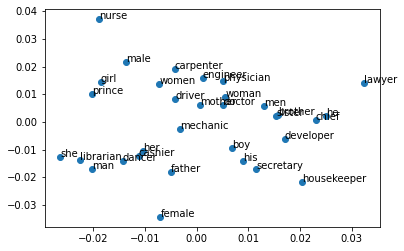

In [22]:
plot_with_matplotlib(x_vals, y_vals, labels)

### Assignment 5

In [24]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
import pprint
pprint.pprint(wv_from_bin.most_similar(positive=['girl', 'toy'], negative=['boy']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['boy', 'toy'], negative=['girl']))

[('toys', 0.7094953060150146),
 ('doll', 0.5932914614677429),
 ('dolls', 0.570662260055542),
 ('barbie', 0.5407706499099731),
 ('mattel', 0.5328551530838013),
 ('accessories', 0.5206909775733948),
 ('hasbro', 0.49227219820022583),
 ('jewelry', 0.47385692596435547),
 ('lego', 0.4690813422203064),
 ('apparel', 0.46136239171028137)]

[('toys', 0.71570885181427),
 ('hasbro', 0.5164632797241211),
 ('robot', 0.47317108511924744),
 ('pet', 0.4670490324497223),
 ('manufacturer', 0.4668163061141968),
 ('mattel', 0.4582391679286957),
 ('lego', 0.45811763405799866),
 ('miniature', 0.4441472291946411),
 ('makers', 0.44298243522644043),
 ('manufactured', 0.44275349378585815)]


Omission